In [1]:
%load_ext autoreload
%autoreload 2

import RIS_gravity_inversion.inversion as inv 
import RIS_gravity_inversion.utils as utils

import numpy as np
import pandas as pd
# make beep sound when notify is called at end of long-running cells
from IPython.display import Audio
wave = np.sin(2*np.pi*400*np.arange(10000*1)/10000)
notify = Audio(wave, rate=10000, autoplay=True)

import os 
os.getcwd()
%load_ext snakeviz

/home/tankerma/miniconda/envs/grav_inv2/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [2]:
zoom = 300e3
n_shift = 200e3#150e3#600e3
w_shift = 100e3#-150e3#250e3
buffer = 200e3

# starting inversion region is 1,000km x 1,000km
e_inv = -580000+zoom+w_shift
w_inv = 420000-zoom+w_shift
n_inv = -1420000+zoom-n_shift
s_inv = -420000-zoom-n_shift

inv_reg = [e_inv, w_inv, n_inv, s_inv]
e_buff, w_buff, n_buff, s_buff = int(e_inv-buffer), int(w_inv+buffer), int(n_inv-buffer), int(s_inv+buffer)
buffer_reg = [e_buff, w_buff, n_buff, s_buff]
buffer_reg_str=f'{e_buff}/{w_buff}/{n_buff}/{s_buff}'
inv_reg_ll = "-180/180/-90/-71"

fig_height = 80
fig_width = fig_height*(w_inv-e_inv)/(s_inv-n_inv)

inv_ratio = (s_inv-n_inv)/(fig_height/1000)
buffer_ratio = (s_buff-n_buff)/(fig_height/1000)

inv_proj = f"x1:{inv_ratio}"
buffer_proj = f"x1:{buffer_ratio}"

inv_proj_ll = f"s0/-90/-71/1:{inv_ratio}"
buffer_proj_ll = f"s0/-90/-71/1:{buffer_ratio}"

layers_list = pd.Series([
             'ice',
             'water',
             'bathymetry',
            #  'basement',
            #  'moho'
])

spacing_list = pd.Series([
                10e3,
                10e3,
                10e3,
                # 10e3,
                # 20e3
])

rho_list = pd.Series([
            920, #890 to 917 from Muto et al. 2013
            1030, #from Muto et al. 2013
            2300,
            # 2670,
            # 3300
])

grav_spacing = 10e3

active_layer='bathymetry'

fname_list = pd.Series([
        # SURFACE 
            'inversion_layers/bedmachine/BedMachine_surface_filled.nc',
        # ICEBASE
            'inversion_layers/bedmachine/BedMachine_icebase_filled.nc',
        # BED/BATHYMETRY
            # 'bathymetry_data/bedmap_bedmachine_RIGGS_grd_fill.nc',
            # 'bathymetry_data/bedmap2_bed_regional.nc',
            'inversion_layers/bedmachine/BedMachine_bed.nc',
        # BASEMENT
            # 'inversion_layers/ANTASed_mag_basement_filled.nc',
            # 'inversion_layers/RE_basement_BedMachinebed_filled.nc',
            # 'inversion_layers/lindeque_basement.nc',
        # MOHO
            # 'inversion_layers/An_moho_filt.nc'
            # 'inversion_layers/Shen_moho.nc',
            # 'inversion_layers/Pappa_moho.nc'
])

# forward_layers = {k:v for k,v in layers.items() if k not in ['ice']}

# inv_reg_ll = inv.GMT_reg_xy_to_ll(inv_reg)
# buffer_reg_ll = inv.GMT_reg_xy_to_ll(buffer_reg)

#  Import layers

filtering and resampling ice from 1000m to 10000m
filtering and resampling water from 1000m to 10000m
filtering and resampling bathymetry from 1000m to 10000m
ice: 6400 points, elevations:3256m to 0m
water: 6400 points, elevations:3231m to -2866m
bathymetry: 6400 points, elevations:3231m to -2866m
gravity: 1576 points
gravity avg. elevation: 1000
bathymetry control points:8287288


,x,y,Gobs,z
0,-175000,-925000,-9.495784,1000
1,-165000,-925000,-13.987993,1000
2,-155000,-925000,-9.598879,1000
3,-145000,-925000,-5.276519,1000
4,-135000,-925000,-3.189917,1000
...,...,...,...,...
1571,175000,-1315000,-3.579375,1000
1572,185000,-1315000,-6.830860,1000
1573,195000,-1315000,-10.350890,1000
1574,205000,-1315000,-14.019840,1000


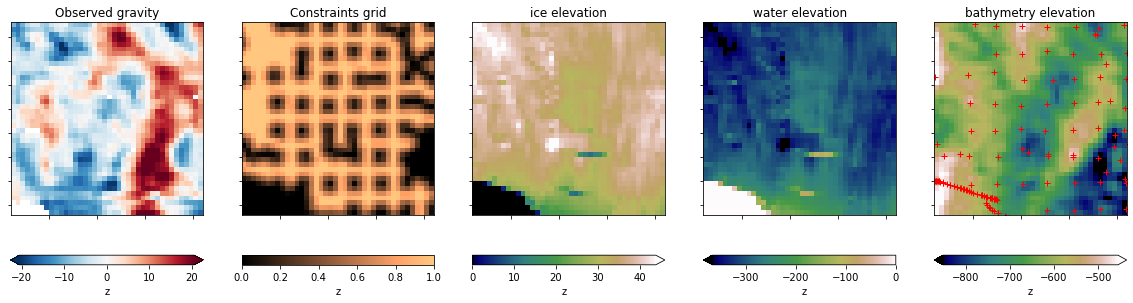

In [3]:
returned = inv.import_layers(
    layers_list, 
    spacing_list, 
    rho_list, 
    fname_list,
    grav_spacing, 
    active_layer,
    buffer_reg,
    inv_reg,

    # Choose between grid and csv, similar comp. times
    # grav_file='gravity_data/rosetta_eq_source_up_continued_Gobs.nc',
    grav_file='gravity_data/rosetta_eq_source_up_continued.csv',

    constraints=True,
    constraints_file='constraints_grid/constraints_grid.nc',
    constraints_points='bathymetry_data/bedmachine_RIGGS.csv',
    
    plot=True,
    plot_region=inv_reg
    )
layers, grav, constraints_grid, constraints_df, constraints_RIS_df = returned
grav

# Make prism layers

bathymetry top: -452m and bottom: -2866m
water top: -116m andbottom: -452m
ice top: 145m andbottom: -116m


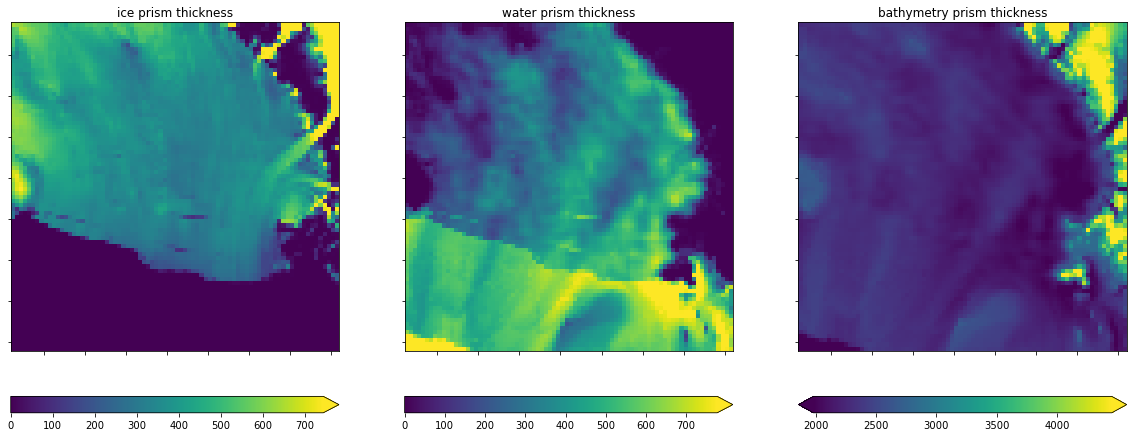

In [4]:
inv.grids_to_prism_layers( 
    layers, 
    plot=True, 
    # plot_region=inv_reg,
    plot_type='2D', 
    buffer_region = buffer_reg,
    ) 

# Forward gravity

using supplied DataFrame for observation points
finished ice layer
finished water layer
finished bathymetry layer


,x,y,Gobs,z,ice_forward_grav,water_forward_grav,bathymetry_forward_grav,forward_total
count,1576.000000,1.576000e+03,1.576000e+03,1576.0,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03
mean,22016.180203,-1.117824e+06,-3.606816e-17,1000.0,6.492269e-16,1.875544e-15,-7.646450e-15,-5.707786e-15
std,114638.215843,1.144939e+05,9.041602e+00,0.0,2.674135e+00,4.380552e+00,8.065109e+00,5.301022e+00
min,-175000.000000,-1.315000e+06,-2.253074e+01,1000.0,-1.215996e+01,-1.178683e+01,-2.261702e+01,-1.391730e+01
25%,-75000.000000,-1.215000e+06,-6.152590e+00,1000.0,-4.982350e-01,-3.315779e+00,-5.248878e+00,-2.956309e+00
50%,25000.000000,-1.115000e+06,-1.189684e+00,1000.0,6.049555e-01,-5.087413e-01,6.682161e-01,-9.136843e-02
75%,125000.000000,-1.015000e+06,5.662935e+00,1000.0,1.343138e+00,3.409886e+00,5.964266e+00,2.563744e+00
max,215000.000000,-9.250000e+05,3.046215e+01,1000.0,4.279352e+00,1.170872e+01,2.000465e+01,2.250069e+01


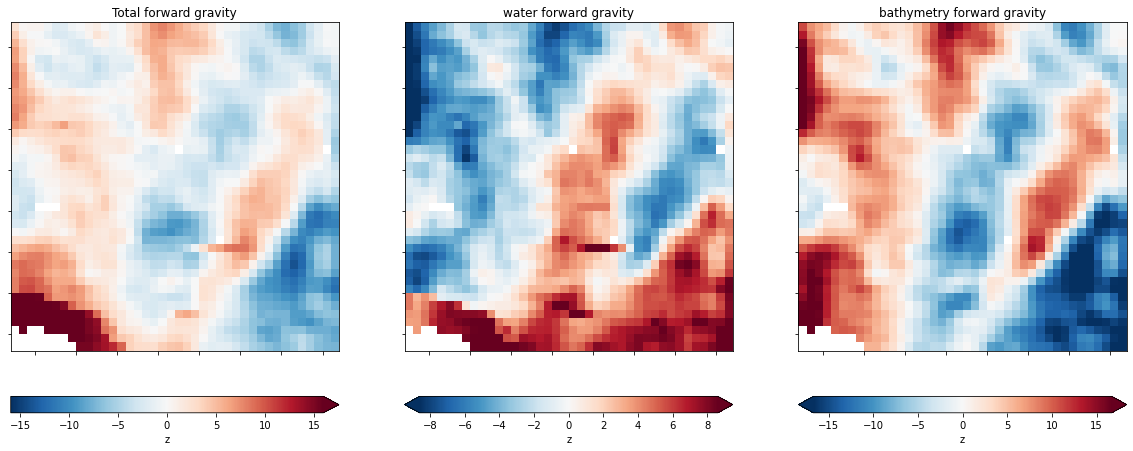

In [5]:
df_forward = inv.forward_grav_layers(
    layers, 
    grav,  
    plot=True,
    grav_spacing=grav_spacing,
    inversion_region = inv_reg,
    exclude_layers=['ice'],
    )
df_forward.describe()
# notify

# Anomalies

filling grid
filled grid


,x,y,Gobs,z,ice_forward_grav,water_forward_grav,bathymetry_forward_grav,forward_total,grav_corrected,misfit,reg,res
count,1576.000000,1.576000e+03,1.576000e+03,1576.0,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03,1576.000000,1576.000000
mean,22016.180203,-1.117824e+06,-3.606816e-17,1000.0,6.492269e-16,1.875544e-15,-7.646450e-15,-5.707786e-15,-5.049542e-16,5.193815e-15,0.081095,-0.081095
std,114638.215843,1.144939e+05,9.041602e+00,0.0,2.674135e+00,4.380552e+00,8.065109e+00,5.301022e+00,9.000807e+00,9.578607e+00,7.418668,4.408561
min,-175000.000000,-1.315000e+06,-2.253074e+01,1000.0,-1.215996e+01,-1.178683e+01,-2.261702e+01,-1.391730e+01,-2.381804e+01,-2.237146e+01,-14.045473,-14.683168
25%,-75000.000000,-1.215000e+06,-6.152590e+00,1000.0,-4.982350e-01,-3.315779e+00,-5.248878e+00,-2.956309e+00,-6.240148e+00,-6.641298e+00,-5.891300,-2.874330
50%,25000.000000,-1.115000e+06,-1.189684e+00,1000.0,6.049555e-01,-5.087413e-01,6.682161e-01,-9.136843e-02,-1.389192e+00,-7.013753e-01,-0.723133,-0.082728
75%,125000.000000,-1.015000e+06,5.662935e+00,1000.0,1.343138e+00,3.409886e+00,5.964266e+00,2.563744e+00,5.675452e+00,5.752359e+00,6.093743,2.762908
max,215000.000000,-9.250000e+05,3.046215e+01,1000.0,4.279352e+00,1.170872e+01,2.000465e+01,2.250069e+01,3.038954e+01,3.133805e+01,17.739319,14.913095


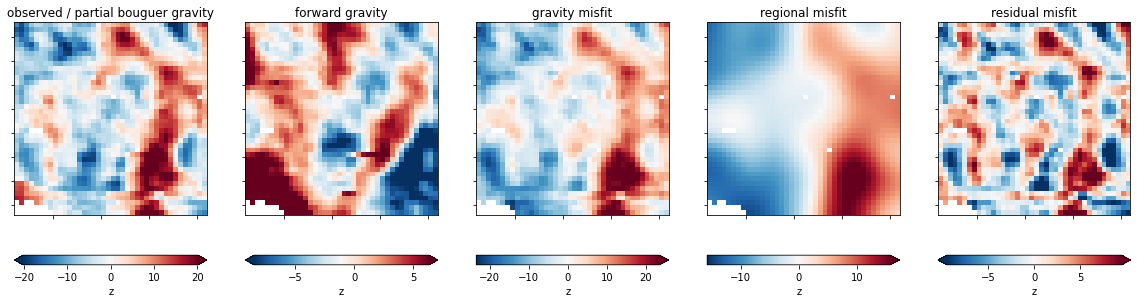

In [6]:
filter='g200e3'
df_anomalies = inv.anomalies(
        layers, 
        df_forward,
        grav_spacing, 
        'filter', 
        filter=filter,
        inversion_region=inv_reg,
        corrections=['ice'], 
        plot=True, 
        plot_constraints=False,
        # constraints2plot=constraints_RIS_df,
        )
df_anomalies.describe()

In [7]:
# trend=8
# df_anomalies = inv.anomalies(
#         layers, 
#         df_forward,
#         grav_spacing, 
#         'trend', 
#         trend=trend,
#         inversion_region=inv_reg,
#         corrections=['ice'], 
#         plot=True, 
#         plot_constraints=False,
#         # constraints2plot=constraints_RIS_df,
#         )
# df_anomalies.describe()

In [8]:
# df_anomalies = inv.anomalies(
#         layers, 
#         df_forward, 
#         grav_spacing, 
#         'constraints', 
#         constraints=constraints_df,
#         constraints2plot=constraints_RIS_df,
#         inversion_region=inv_reg,
#         corrections=['ice'], 
#         plot=True, 
#         plot_constraints=False,
#         )
# df_anomalies.describe()

# Geo inversion

In [9]:
# %%snakeviz --new-tab
regional_method='filter'

iter_corrections, df_inversion = inv.geo_inversion(
    active_layer='bathymetry',
    layers=layers, 
    input_grav=df_anomalies, 
    regional_method = regional_method,
    Max_Iterations=3,
    deriv_type='prisms',
    max_layer_change_per_iter=100,

    apply_constraints = False,
    constraints_grid=constraints_grid,
    exclude_layers=['ice'],

    filter=filter, 
    # trend=trend,
    constraints=constraints_df,

    inversion_region = inv_reg,
    buffer_region=buffer_reg,
    grav_spacing = grav_spacing,
    ) 
# full size, just ROSETTA, 5km res, Ice/Water/Bathy, annulus, 5its, 5th trend,: 18m 3s
# full size, just ROSETTA, 5km res, Ice/Water/Bathy, annulus, 5its, 400km filter,: 19m 35s

# 07/27/22, full size, just ROSETTA, 20km res, Ice/Water/Bathy, annulus, 3its, constraints off
# 200km filter. 200km buffer,: 14mins
# 07/27/22, full size, just ROSETTA, 20km res, Ice/Water/Bathy, prisms, 3its, constraints off
# res from 200km filter. 200km buffer,: 2 mins

# 07/28/22, full size, just ROSETTA, 10km res, Ice/Water/Bathy, prisms, 3its, constraints off
# res from constraints. 200km buffer, mins
notify

##################################
iteration 1
initial RMS residual = 4.41mGal
RMS layer correction 24.42m
constraints not applied
calculating updated forward gravity
updating the misfits
filling grid
filled grid
final RMS residual = 2.65mGal
##################################
iteration 2
initial RMS residual = 2.65mGal
RMS layer correction 15.16m
constraints not applied
calculating updated forward gravity
updating the misfits
filling grid
filled grid
final RMS residual = 1.64mGal
##################################
iteration 3
initial RMS residual = 1.64mGal
RMS layer correction 9.49m
constraints not applied
calculating updated forward gravity
updating the misfits
filling grid
filled grid
final RMS residual = 1.1mGal
Inversion terminated after 3 iterations with least-squares norm=1 because maximum number of iterations (3) reached


In [10]:
iter_corrections

,y,x,density,top,bottom,correction,iter_1_initial_top,iter_1_final_top,iter_1_correction,iter_2_initial_top,iter_2_final_top,iter_2_correction,iter_3_initial_top,iter_3_final_top,iter_3_correction
0,-1515000.0,-375000.0,2300.0,-1938.808350,-2866.019775,-1.085892e-03,-1938.808350,-1938.809436,-1.085892e-03,-1938.809448,-1938.810687,-0.001239,-1938.810669,-1938.811895,-0.001226
1,-1515000.0,-365000.0,2300.0,-1760.496948,-2866.019775,-1.076590e-03,-1760.496948,-1760.498025,-1.076590e-03,-1760.498047,-1760.499278,-0.001231,-1760.499268,-1760.500488,-0.001221
2,-1515000.0,-355000.0,2300.0,-1636.249512,-2866.019775,-1.085794e-03,-1636.249512,-1636.250598,-1.085794e-03,-1636.250610,-1636.251855,-0.001244,-1636.251831,-1636.253067,-0.001236
3,-1515000.0,-345000.0,2300.0,-1634.627441,-2866.019775,-1.146997e-03,-1634.627441,-1634.628588,-1.146997e-03,-1634.628540,-1634.629856,-0.001316,-1634.629883,-1634.631193,-0.001310
4,-1515000.0,-335000.0,2300.0,-1698.508057,-2866.019775,-1.243143e-03,-1698.508057,-1698.509300,-1.243143e-03,-1698.509277,-1698.510705,-0.001428,-1698.510742,-1698.512165,-0.001423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,-725000.0,375000.0,2300.0,1306.376221,-2866.019775,-1.398522e-05,1306.376221,1306.376207,-1.398522e-05,1306.376221,1306.376258,0.000038,1306.376221,1306.376274,0.000053
6396,-725000.0,385000.0,2300.0,1189.442383,-2866.019775,-9.352778e-06,1189.442383,1189.442373,-9.352778e-06,1189.442383,1189.442404,0.000021,1189.442383,1189.442413,0.000030
6397,-725000.0,395000.0,2300.0,1017.540161,-2866.019775,-9.226823e-07,1017.540161,1017.540160,-9.226823e-07,1017.540161,1017.540163,0.000002,1017.540161,1017.540164,0.000003
6398,-725000.0,405000.0,2300.0,827.015747,-2866.019775,9.172892e-06,827.015747,827.015756,9.172892e-06,827.015747,827.015731,-0.000016,827.015747,827.015724,-0.000023


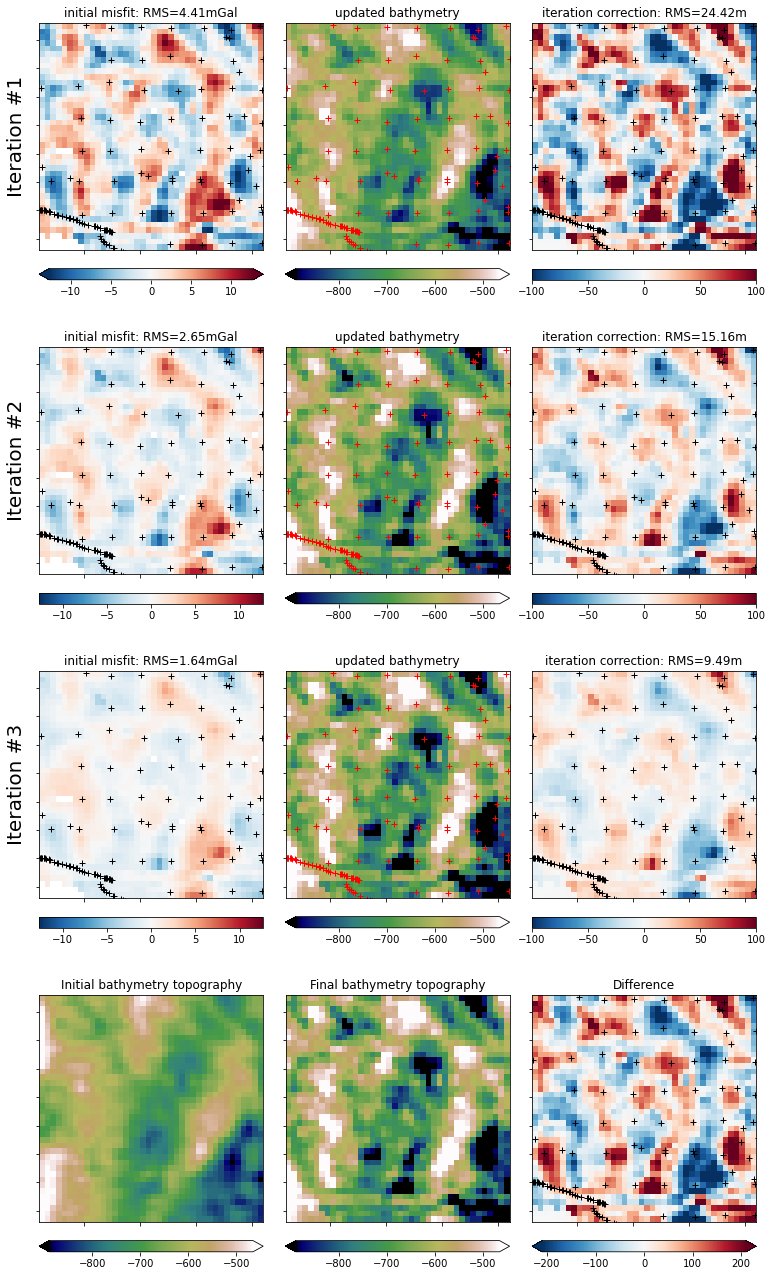

In [14]:
inv.plot_inversion_results(
    df_inversion,
    'bathymetry',
    grav_spacing,
    'epsg:3031',
    layers,
    iter_corrections,
    inversion_region = inv_reg,
    # plot_region = buffer_reg,
    plot_constraints = True,
    constraints = constraints_RIS_df,
)

# Density inversion

In [12]:
# density_inversion(density_layer='bathymetry', plot=True) #10mins, 200km zoom/5k, 3.5mins 400km zoom/5k (113x113 prisms, 33x33 grav)
# notify